# SMS Spam Collection 

Data Set Information:

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. 
-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. 
-> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis .
-> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages. This corpus has been used in the following academic researches:

[1] GÃ³mez Hidalgo, J.M., Cajigas Bringas, G., Puertas Sanz, E., Carrero GarcÃ­a, F. Content Based SMS Spam Filtering. Proceedings of the 2006 ACM Symposium on Document Engineering (ACM DOCENG'06), Amsterdam, The Netherlands, 10-13, 2006.

[2] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Feature engineering for mobile (SMS) spam filtering. Proceedings of the 30th Annual international ACM Conference on Research and Development in information Retrieval (ACM SIGIR'07), New York, NY, 871-872, 2007.

[3] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Spam filtering for short messages. Proceedings of the 16th ACM Conference on Information and Knowledge Management (ACM CIKM'07). Lisbon, Portugal, 313-320, 2007.


Attribute Information:

The collection is composed by just one text file, where each line has the correct class followed by the raw message. We offer some examples bellow:

ham What you doing?how are you?
ham Ok lar... Joking wif u oni...
ham dun say so early hor... U c already then say...
ham MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H*
ham Siva is in hostel aha:-.
ham Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was wif n he finally guessed darren lor.
spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop
spam Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B
spam URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU

Note: the messages are not chronologically sorted.


Relevant Papers:

We offer a comprehensive study of this corpus in the following paper. This work presents a number of statistics, studies and baseline results for several machine learning methods.

Almeida, T.A., GÃ³mez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.



Citation Request:

If you find this dataset useful, you make a reference to our paper and the web page:  in your papers, research, etc;
Send us a message to talmeida ufscar.br or jmgomezh yahoo.es in case you make use of the corpus.

We would like to thank Min-Yen Kan and his team for making the NUS SMS Corpus available.



# 1. Loading the Data
Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("data/SMSSpamCollection", sep="\t", names=['target','message'])
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.columns

Index(['target', 'message'], dtype='object')

# 2. Exploratory Data Analysis

In [5]:
df.shape

(5572, 2)

In [6]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

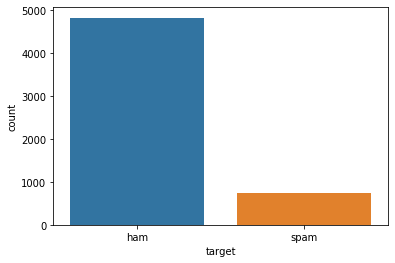

In [7]:
sns.countplot(x='target', data=df)

## Word Cloud for the spam SMS

In [8]:
from wordcloud import WordCloud, STOPWORDS

In [9]:
new_df = df.loc[df['target']=='spam', :]
new_df.head()

,target,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [10]:
new_df['target'].value_counts()

spam    747
Name: target, dtype: int64

In [11]:
words = ' '.join(new_df['message'])
print(words[:2000])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or clic

In [12]:
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                        ])

In [13]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

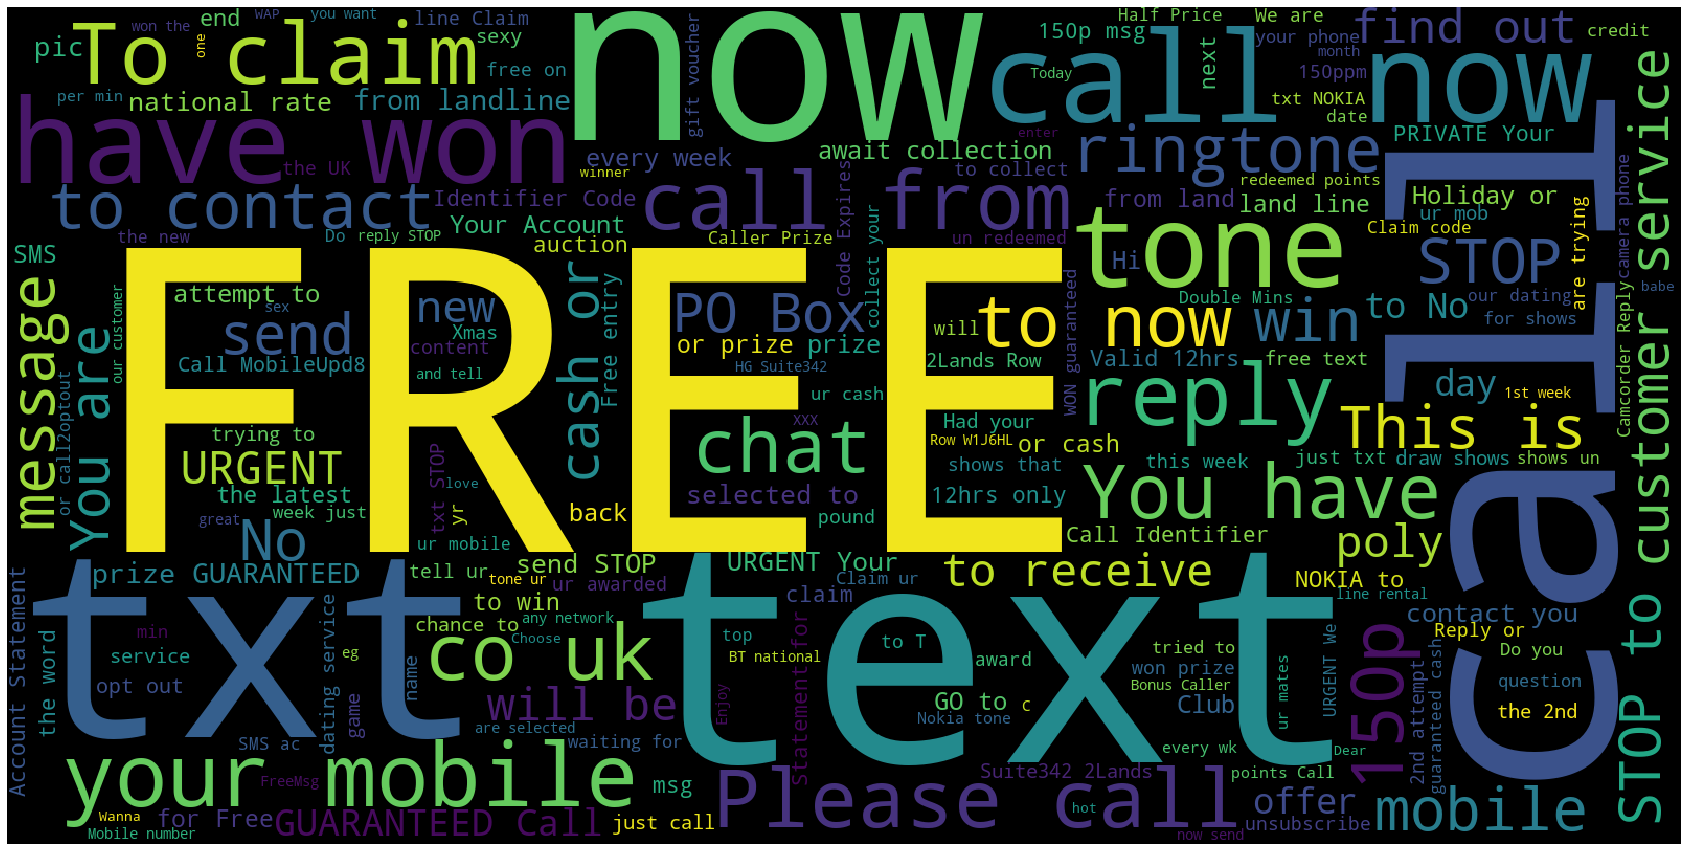

In [14]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Word Cloud for the ham SMS

In [15]:
neww_df = df.loc[df['target']=='ham', :]
neww_df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [16]:
neww_df['target'].value_counts()

ham    4825
Name: target, dtype: int64

In [17]:
words = ' '.join(neww_df['message'])
print(words[:2000])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don't think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today. I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i'm watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if thats the way u feel. Thats the way its gota 

In [18]:
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('#')
                        ])

In [19]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

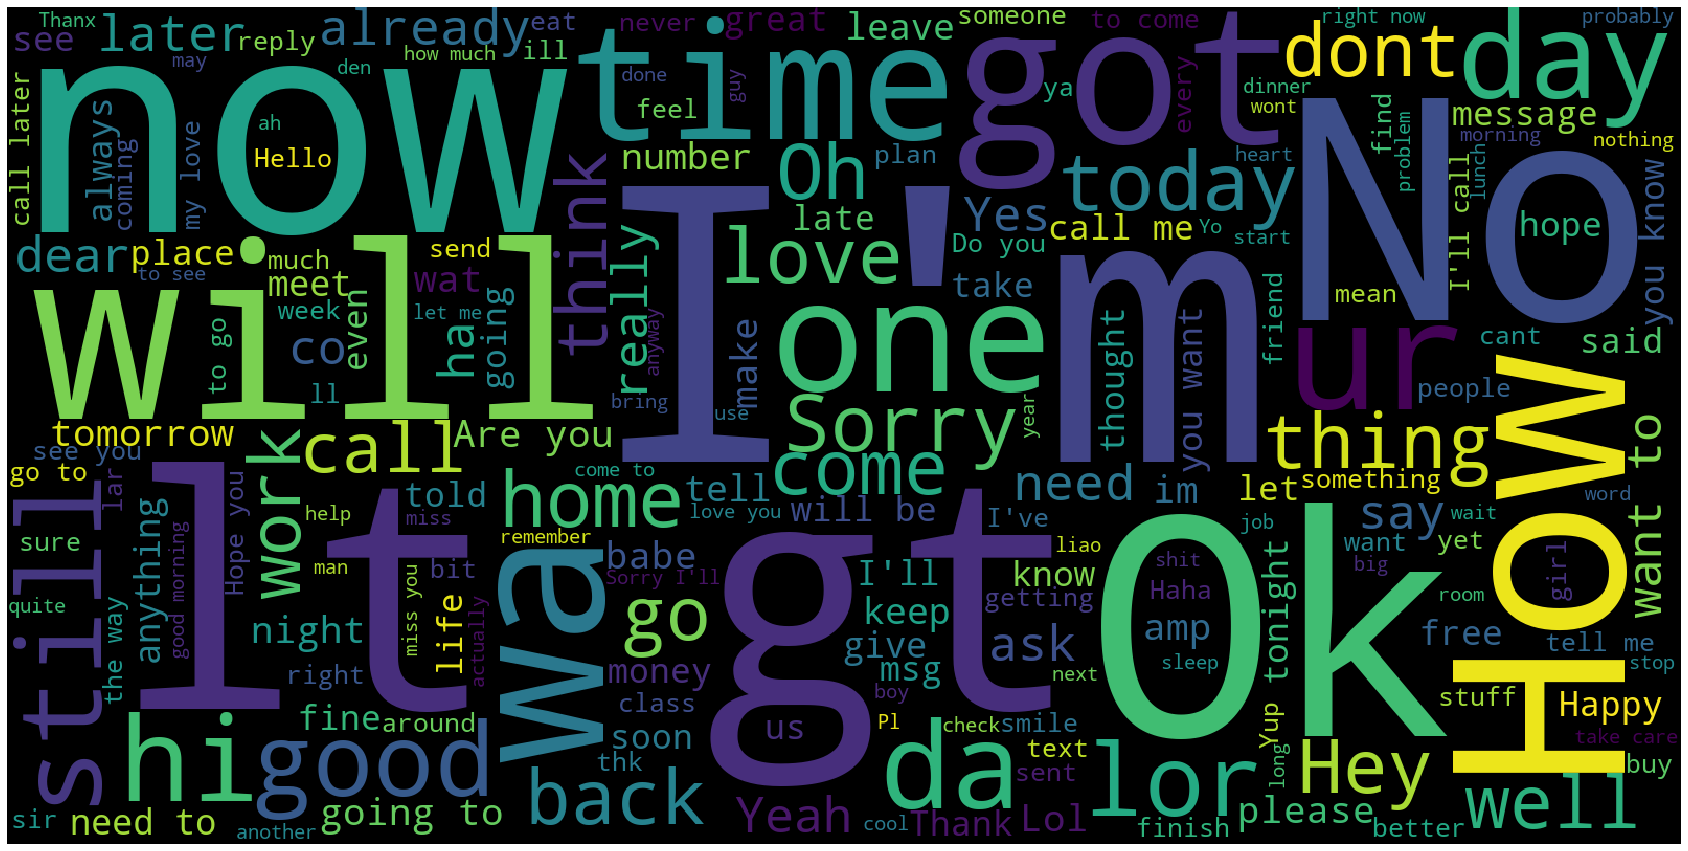

In [20]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [21]:
 import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prashant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prashant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 3. Data Preprocessing

In [22]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [23]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [24]:
## We can also use Lemmatizer instead of Stemmer

lemmatizer = WordNetLemmatizer()

In [25]:
# initializing the lists

clean_spam_lst = []

spam_len_lst = []

In [26]:
def preprocess(raw_tweet, flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_spam_lst.append(" ".join(words))
    
    spam_len_lst.append(len(words))

Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the language say ‘warm’, warmer’, ‘warming’ and ‘warmed,’ are represented by a single token - ‘warm’, because they all represent the same information (represented by the 'stem' of the word).

In [27]:
from tqdm import tqdm

tqdm.pandas()

In [28]:
clean_spam_lst = []

spam_len_lst = []

df['message'].progress_apply(lambda x: preprocess(x, 'stem'))

df['clean_spam_stem'] = clean_spam_lst

df['spam_length_stem'] = spam_len_lst

100%|█████████████████████████████████████████████████████████████████████████████| 5572/5572 [00:37<00:00, 147.11it/s]


In [29]:
clean_spam_lst = []

spam_len_lst = []

df['message'].progress_apply(lambda x: preprocess(x, 'lemma'))

df['clean_spam_lema'] = clean_spam_lst

df['spam_length_lema'] = spam_len_lst

100%|█████████████████████████████████████████████████████████████████████████████| 5572/5572 [00:40<00:00, 138.04it/s]


In [30]:
df.head()

,target,message,clean_spam_stem,spam_length_stem,clean_spam_lema,spam_length_lema
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7


# 4. Data Preparation

In [31]:
# Preparing the target variable

df['type']=df['target'].apply(lambda x: 0 if x=='spam' else 1)

df.head()

,target,message,clean_spam_stem,spam_length_stem,clean_spam_lema,spam_length_lema,type
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16,1
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21,0
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7,1


In [32]:
# splitting into test and train

from sklearn.model_selection  import train_test_split

train, test = train_test_split(df,test_size=0.2,random_state=42)

In [33]:
train_clean_spam=[]
for message in train['clean_spam_stem']:
    train_clean_spam.append(message)

test_clean_spam=[]
for message in test['clean_spam_stem']:
    test_clean_spam.append(message)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word")

train_features = vectorizer.fit_transform(train_clean_spam)

test_features = vectorizer.transform(test_clean_spam)

In [35]:
vectorizer.vocabulary_

{'repli': 3969,
 'win': 5387,
 'weekli': 5323,
 'fifa': 1661,
 'world': 5452,
 'cup': 1082,
 'held': 2114,
 'send': 4196,
 'stop': 4586,
 'end': 1461,
 'servic': 4213,
 'hello': 2118,
 'sort': 4461,
 'town': 4980,
 'alreadi': 147,
 'dont': 1314,
 'rush': 4069,
 'home': 2171,
 'eat': 1403,
 'nacho': 3145,
 'let': 2680,
 'know': 2577,
 'eta': 1512,
 'come': 931,
 'guoyang': 2032,
 'go': 1930,
 'tell': 4784,
 'told': 4934,
 'hey': 2130,
 'sathya': 4122,
 'till': 4897,
 'dint': 1255,
 'meet': 2934,
 'even': 1523,
 'singl': 4330,
 'time': 4898,
 'saw': 4131,
 'situat': 4342,
 'orang': 3389,
 'bring': 619,
 'rington': 4019,
 'chart': 793,
 'hero': 2127,
 'free': 1779,
 'hit': 2144,
 'week': 5321,
 'pic': 3571,
 'wap': 5279,
 'receiv': 3911,
 'tip': 4900,
 'sit': 4337,
 'mu': 3107,
 'wait': 5261,
 'everyon': 1531,
 'get': 1890,
 'suit': 4652,
 'take': 4736,
 'shower': 4290,
 'finish': 1680,
 'liao': 2684,
 'urgent': 5146,
 'mobil': 3034,
 'award': 353,
 'bonu': 563,
 'caller': 702,
 'prize': 

In [36]:
print("Total unique words:", len(vectorizer.vocabulary_))
print("Type of train_features:", type(train_features))
print("Shape of input data", train_features.shape)

Total unique words: 5593
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (4457, 5593)


# 5. Model Building and Evaluation

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Logistic Regression

In [38]:
Classifiers = [
    LogisticRegression()]

In [39]:
dense_features = train_features.toarray()
dense_test = test_features.toarray()

for classifier in tqdm(Classifiers):
    fit = classifier.fit(dense_features,train['type'])
    pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['type'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.77s/it]

Accuracy of LogisticRegression is 0.9838565022421525


In [40]:
#confusion metrics
from sklearn import metrics
conf_metric = metrics.confusion_matrix(pred,test['type'])
conf_metric

array([[132,   1],
       [ 17, 965]], dtype=int64)

In [41]:
#Checking Precision, Recall and F1 Score

print(metrics.classification_report(pred,test['type']))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       133
           1       1.00      0.98      0.99       982

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.96      1115
weighted avg       0.99      0.98      0.98      1115



## Decision Tree

In [42]:
classifier_dt = [DecisionTreeClassifier()]

In [43]:
dense_features = train_features.toarray()
dense_test = test_features.toarray()

for classifier in tqdm(classifier_dt):
    fit = classifier.fit(dense_features,train['type'])
    pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['type'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:23<00:00, 23.20s/it]

Accuracy of DecisionTreeClassifier is 0.979372197309417


In [44]:
#confusion metrics
from sklearn import metrics
conf_metric = metrics.confusion_matrix(pred,test['type'])
conf_metric

array([[131,   5],
       [ 18, 961]], dtype=int64)

In [45]:
#Checking Precision, Recall and F1 Score
print(metrics.classification_report(pred,test['type']))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       136
           1       0.99      0.98      0.99       979

    accuracy                           0.98      1115
   macro avg       0.94      0.97      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## SVM

In [46]:
classifier_svc = [SVC()]

In [47]:
dense_features = train_features.toarray()
dense_test = test_features.toarray()

for classifier in tqdm(classifier_svc):
    fit = classifier.fit(dense_features,train['type'])
    pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['type'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:16<00:00, 76.51s/it]

Accuracy of SVC is 0.9838565022421525


In [48]:
#confusion metrics
from sklearn import metrics
conf_metric = metrics.confusion_matrix(pred,test['type'])
conf_metric

array([[131,   0],
       [ 18, 966]], dtype=int64)

In [49]:
#Checking Precision, Recall and F1 Score
print(metrics.classification_report(pred,test['type']))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       131
           1       1.00      0.98      0.99       984

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.96      1115
weighted avg       0.99      0.98      0.98      1115

